In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

tamaño = 1000
def randu(seed, n):
    x = seed
    lista = []
    for i in range(0,n):
        x = (pow(2,16) + 3) * x % (pow(2, 31))
        y = x / (pow(2, 31) - 1)
        lista = np.append(lista, y)
    return lista
def uniform(a,b,n):
    r = randu(41097334, n)
    for i in range(n):
        r[i] = a + (b - a) * r[i]
    return r

def exp(ex, n):
    r = randu(41097334, n)
    for i in range(n):
        r[i] = -ex * np.log(r[i])
    return r

def gamma(a, n, k):
    lista = np.array([])
    r = randu(410973364, k)
    for i in range(0,(k)):
        tr = 1.0
        for j in range(n):
            r = randu(r[j], n)
            tr = tr * r[j]
        lista = np.append(lista, [-np.log(tr) / a])
    return lista

def normal(ex, stdx, k):
    lista = np.array([])
    r = randu(41097334, 12)
    for j in range(k):
        sum = 0.0
        for i in range(12):
            r = randu(r[i], 12)
            sum = sum + r[i]
        lista = np.append(lista,stdx * (sum - 6.0) + ex)
    return lista


def pascal(k, q, n):
    qr = np.log(q)
    r = randu(41097334, k)
    lista = np.array([])
    for j in range(n):
        tr = 1.0
        for i in range(k):
            r = randu(r[i], k)
            tr = tr * r[i]
        lista = np.append(lista, np.log(tr)/qr)
    return lista


def binomial(n, p, k):
    r = randu(41097334, n)
    lista = np.array([])
    for i in range(k):
        x = 0
        for j in range(n):
            r = randu(r[j], n)
            if (r[j]-p) <= 0:
                x += 1
        lista = np.append(lista, x)
    return lista
    
def hiperg(tn,ns,p,k):
    x = 0
    r = randu(41097334, ns)
    lista = np.array([])
    for i in range(k):
        x = 0.0
        tnn = tn
        pn = p
        for j in range(ns):
            r  = randu(r[j],ns)
            if ( (r[j] - pn) <= 0):
                s = 1.0
                x = x + 1
            else:
                s = 0.0            
            if tnn -1 != 0:
                pn = (tnn * pn - s)/(tnn - 1.0)
            tnn = tnn - 1.0
        lista = np.append(lista, x)
    return lista
        
  

def poisson(p, k):
    lista = np.array([])
    r = randu(1232134, 100)
    for i in range(k):
        x = 0
        b = np.exp(-p)
        tr = 1
        j = 0
        while(True):
            r = randu(r[j], j+10)
            tr = tr * r[j]
            if tr - b >= 0:
                x = x+1
            else:
                break
            j = j + 1
        lista = np.append(lista, x)
    return lista



def frecuencianormal():
    lista = normal(25,3, tamaño)
    frec = [0] * 10
    for y in lista:
      if y < 20:
        frec[int(y-11)] += 1
    return frec

def frecuenciauniforme():
    lista = uniform(0,10,tamaño)
    frec = [0] * 10
    for y in lista:
        frec[int(y)] += 1
    return frec

def frecuenciaexp():
    lista = exp(1,1000)
    frec = [0] * 10
    for y in lista:
        frec[int(y-11)] += 1
    return frec


def frecuenciagamma(a, n, k):
    lista = gamma(a,n,k)
    frec = [0] * 1000
    for y in lista:
        if y<=1000:
            frec[int(y-60)] += 1
    return frec

def frecuenciapascal(k,q,n):
    lista = pascal(k,q,n)
    frec = [0] * 100
    for y in lista:
        if (-y)<100:
            frec[int(-y)] += 1
    return frec

"""
x = np.arange(1000)
y = np.array(frecuenciagamma(0.5, 9, 10000)) / 10000
X_ = np.linspace(x.min(), x.max(), 500)
X_Y_Spline = make_interp_spline(x, y)
Y_ = X_Y_Spline(X_)
plt.plot(X_, Y_)
plt.xlim(0,50)
plt.title("gamma")
plt.show()

x = np.arange(10)
y = np.array(frecuenciaexp()) / 1000
X_ = np.linspace(x.min(), x.max(), 500)
X_Y_Spline = make_interp_spline(x, y)
Y_ = X_Y_Spline(X_)
plt.plot(X_, Y_)
plt.title("exp")
plt.show()

x = np.arange(10)
y = np.array(frecuenciauniforme()) / tamaño
X_ = np.linspace(x.min(), x.max(), 500)
X_Y_Spline = make_interp_spline(x, y)
Y_ = X_Y_Spline(X_)
plt.ylim(0,0.15)
plt.plot(X_, Y_)
plt.title("uniforme")
plt.show()


x = np.arange(10)
y = np.array(frecuenciauniforme()) / tamaño
plt.bar(x,y)
plt.title("uniforme")
plt.show()

x = np.arange(10)
y = np.array(frecuencianormal()) / tamaño
X_ = np.linspace(x.min(), x.max(), 500)
X_Y_Spline = make_interp_spline(x, y)
Y_ = X_Y_Spline(X_)

plt.plot(X_, Y_)
plt.title("normal")
plt.show()

x = np.arange(100)
y = np.array((poisson(50,tamaño)))
frec = [0] * 100
for i in range(tamaño):
  frec[int(y[i])] = frec[int(y[i])] + 1

for i in range(100):
  frec[i] = frec[i] / tamaño

plt.bar(x, frec)
plt.xlim(5,40)
plt.title("Poisson")
plt.show()

x = np.arange(3,19)
y = np.array(binomial(20, 0.5, tamaño))
frec = [0] * 16
for i in range(tamaño):
  frec[int(y[i]) - 4] = frec[int(y[i]) - 4] + 1

for i in range(16):
  frec[i] = frec[i] / tamaño


plt.bar(x, frec)
plt.xlim(3,19)
plt.title("Binomial")
plt.show()


x = np.arange(10)
y = np.array(hiperg(20,10,0.5,tamaño))
frec = [0] * 10
for i in range(tamaño):
  frec[int(y[i]) - 3] = frec[int(y[i]) - 3] + 1

for i in range(10):
  frec[i] = frec[i] / tamaño


plt.bar(x, frec)
plt.xlim(-1,6)
plt.title("hipergeometrica")
plt.show()
"""

def frecuenciabinomial():
    y = np.array(binomial(20, 0.5, tamaño))
    frec = [0] * 16
    for i in range(tamaño):
        frec[int(y[i]) - 4] = frec[int(y[i]) - 4] + 1
    for i in range(16):
        frec[i] = frec[i]
    return frec

def frecuenciapoisson():
    y = np.array((poisson(50,tamaño)))
    frec = [0] * 40
    for i in range(tamaño):
        frec[int(y[i])] = frec[int(y[i])] + 1
    for i in range(40):
        frec[i] = frec[i]
    return frec


def chicuadradouni(frec):
    chi = []
    for i in range(len(frec)):
        chi.append(pow((frec[i] - tamaño * 0.1), 2) / tamaño * 0.1) 
    print(sum(chi))

chicuadradouni(frecuenciauniforme())

def chicuadradoexp(frec):
    chi = []
    for i in range(len(frec)):
        if( i == 0):
            chi.append(pow((frec[i] - tamaño * 0.63212), 2) / tamaño * 0.63212) 
        if( i == 1):
            chi.append(pow((frec[i] - tamaño * 0.23254), 2) / tamaño * 0.23254) 
        if( i == 2):
            chi.append(pow((frec[i] - tamaño * 0.08554), 2) / tamaño * 0.08554) 
        if( i == 3):
            chi.append(pow((frec[i] - tamaño * 0.03147), 2) / tamaño * 0.03147) 
        if( i == 4):
            chi.append(pow((frec[i] - tamaño * 0.01157), 2) / tamaño * 0.01157) 
        if( i == 5):
            chi.append(pow((frec[i] - tamaño * 0.00425), 2) / tamaño * 0.00425) 
        if( i == 6):
            chi.append(pow((frec[i] - tamaño * 0.00156), 2) / tamaño * 0.00156) 
        if( i == 7):
            chi.append(pow((frec[i] - tamaño * 0.00057), 2) / tamaño * 0.00057) 
        if( i == 8):
            chi.append(pow((frec[i] - tamaño * 0.00021), 2) / tamaño * 0.00021) 
        if( i == 9):
            chi.append(pow((frec[i] - tamaño * 0.00007), 2) / tamaño * 0.00007) 
    print(sum(chi))

chicuadradoexp(frecuenciaexp())

def chicuadradonormal(frec):
    chi = []
    for i in range(len(frec)):
        if( i == 0):
            chi.append(pow((frec[i] - tamaño * 0.63212), 2) / tamaño * 0.63212) 
        if( i == 1):
            chi.append(pow((frec[i] - tamaño * 0.23254), 2) / tamaño * 0.23254) 
        if( i == 2):
            chi.append(pow((frec[i] - tamaño * 0.08554), 2) / tamaño * 0.08554) 
        if( i == 3):
            chi.append(pow((frec[i] - tamaño * 0.03147), 2) / tamaño * 0.03147) 
        if( i == 4):
            chi.append(pow((frec[i] - tamaño * 0.01157), 2) / tamaño * 0.01157) 
        if( i == 5):
            chi.append(pow((frec[i] - tamaño * 0.00425), 2) / tamaño * 0.00425) 
        if( i == 6):
            chi.append(pow((frec[i] - tamaño * 0.00156), 2) / tamaño * 0.00156) 
        if( i == 7):
            chi.append(pow((frec[i] - tamaño * 0.00057), 2) / tamaño * 0.00057) 
        if( i == 8):
            chi.append(pow((frec[i] - tamaño * 0.00021), 2) / tamaño * 0.00021) 
        if( i == 9):
            chi.append(pow((frec[i] - tamaño * 0.00007), 2) / tamaño * 0.00007) 
    print(sum(chi))

def chicuadradobinomial(frec):
    chi = []
    esperada = [0.00018, 0.00109, 0.00462, 0.01479, 0.03696, 0.07393, 0.12013, 0.16018, 0.17620, 0.16018, 0.12013, 0.07393, 0.03696, 0.01479, 0.00462, 0.00109]
    for i in range(len(frec)):
        chi.append(pow(frec[i] - tamaño * esperada[i], 2) / tamaño * esperada[i])
    return sum(chi)

print(chicuadradobinomial(frecuenciabinomial()))

def chicuadradopoisson(frec):
    chi = []
    esperada = [0,0,0,0,0,0.00005,0.00018,0.00052,0.00131,0.00291,0.00582,0.01058, 0.01763, 0.02712, 0.03874, 0.05165, 0.06456, 0.07595, 0.08439, 0.08884, 0.08884, 0.08461, 0.07691, 0.06688, 0.05573, 0.04459, 0.03430, 0.02541, 0.01815, 0.01252, 0.00834, 0.00538, 0.00336, 0.00204, 0.00120, 0.00069, 0.00038, 0.00021, 0.00011, 0.00006, 0.000003]
    for i in range(len(frec)):
        chi.append(pow(frec[i] - tamaño * esperada[i], 2) / tamaño * esperada[i])
    return sum(chi)

print(chicuadradopoisson(frecuenciapoisson()))

0.10040000000000002
0.04734894551000005
1.3676468534679997
0.06205060195800002


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import random
import math

tamaño = 1000





def randu(seed, n):
    x = seed
    lista = []
    for i in range(0,n):
        x = (pow(2,16) + 3) * x % (pow(2, 31))
        y = x / (pow(2, 31) - 1)
        lista = np.append(lista, y)
    return lista


def pascal(k,q): 
  tr = 1.0
  qr = np.log(q)
  for i in range(k):
    r = random.random()
    tr = tr * r 
  x = np.log(tr)/qr
  return x


def frecuenciapascal(k,q,n):
    frec = [0] * 200
    for i in range(n):
      x = pascal(k,q)
      print(x)
      if (x < 200):
        frec[math.trunc(x)] = frec[math.trunc(x)] + 1
    return frec


print(frecuenciapascal(50,0.5,1000))

x = np.arange(200)
y = np.array(frecuenciapascal(50,0.5,1000)) / 10000
X_ = np.linspace(x.min(), x.max(), 500)
X_Y_Spline = make_interp_spline(x, y)
Y_ = X_Y_Spline(X_)
plt.bar(x, y)
plt.xlim(20,200)
plt.title("pascal")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import random
import math

def hipergeo(tn,ns,p):
  x = 0
  for i in range(ns):
    r = random.random()
    if (r-p<= 0):
      s = 1
      x = x + 1
    else:
      s = 0
    p = (tn * p - s) / (tn - 1)
    tn = tn - 1
  return x  


lista = np.array([])
for i in range(10000):
    lista = np.append(lista, hipergeo(20,10,0.2))

x = np.arange(50)
y = np.array(lista)
plt.hist(y, x)
plt.title("hipergeometrica")
plt.show()



def crear_casillas_empirica(muestra): 
  casillas =[]
  casillas.append(-0.0001)
  pos = 0
  for i in muestra:
    pos = pos + i[1]
    casillas.append(pos) 
  return casillas

def empirica(muestra,casillas):
  r = random.random()
  for i in range(1,len(casillas)):
    if casillas[i-1] < r <= casillas[i]: 
      return muestra[i-1][0]
tamaño = 100000
lista = [0] * 7
for i in range(tamaño):
  x = empirica([[0,0.2],[1, 0.01],[2,0.09],[3,0.1],[4,0.3],[5,0.15],[6,0.15]], crear_casillas_empirica([[0,0.2],[1, 0.01],[2,0.09],[3,0.1],[4,0.3],[5,0.15],[6,0.15]]))
  lista[x] = lista[x] + 1

for i in range(7):
  lista[i] = lista[i] / tamaño

x = np.arange(7)
y = lista
plt.bar(x, y)
plt.title("empirica discreta")
plt.show()


In [4]:
def frecuenciapascal(k, q, n):
    lista = f.pascal(k,q,n)
    frec = [0] * 40
    for y in lista:
        if y<=40 and y>=0:
            frec[int(y-40)] += 1
    return frec

def frecuenciabinomial():
    y = np.array(f.binomial(20, 0.5, tamaño))
    frec = [0] * 16
    for i in range(tamaño):
        frec[int(y[i]) - 4] = frec[int(y[i]) - 4] + 1
    for i in range(16):
        frec[i] = frec[i] / tamaño
    return frec

def frecuenciapoisson():
    y = np.array((f.poisson(50,tamaño)))
    frec = [0] * 40
    for i in range(tamaño):
        frec[int(y[i])] = frec[int(y[i])] + 1
    for i in range(40):
        frec[i] = frec[i] / tamaño
    return frec


def chicuadradouni(frec):
    chi = []
    for i in range(len(frec)):
        chi.append(pow((frec[i]/tamaño - tamaño * 0.1), 2) / tamaño * 0.1) 
    print(sum(chi))

chicuadradouni(frecuenciauniforme())

def chicuadradoexp(frec):
    chi = []
    for i in range(len(frec)):
        if( i == 0):
            chi.append(pow((frec[i]/tamaño - tamaño * 0.63212), 2) / tamaño * 0.63212) 
        if( i == 1):
            chi.append(pow((frec[i]/tamaño - tamaño * 0.23254), 2) / tamaño * 0.23254) 
        if( i == 2):
            chi.append(pow((frec[i]/tamaño - tamaño * 0.08554), 2) / tamaño * 0.08554) 
        if( i == 3):
            chi.append(pow((frec[i]/tamaño - tamaño * 0.03147), 2) / tamaño * 0.03147) 
        if( i == 4):
            chi.append(pow((frec[i]/tamaño - tamaño * 0.01157), 2) / tamaño * 0.01157) 
        if( i == 5):
            chi.append(pow((frec[i]/tamaño - tamaño * 0.00425), 2) / tamaño * 0.00425) 
        if( i == 6):
            chi.append(pow((frec[i]/tamaño - tamaño * 0.00156), 2) / tamaño * 0.00156) 
        if( i == 7):
            chi.append(pow((frec[i]/tamaño - tamaño * 0.00057), 2) / tamaño * 0.00057) 
        if( i == 8):
            chi.append(pow((frec[i]/tamaño - tamaño * 0.00021), 2) / tamaño * 0.00021) 
        if( i == 9):
            chi.append(pow((frec[i]/tamaño - tamaño * 0.00007), 2) / tamaño * 0.00007) 
    print(sum(chi))

chicuadradoexp(frecuenciaexp())

def chicuadradonormal(frec):
    chi = []
    for i in range(len(frec)):
        if( i == 0):
            chi.append(pow((frec[i]/tamaño - tamaño * 0.63212), 2) / tamaño * 0.63212) 
        if( i == 1):
            chi.append(pow((frec[i]/tamaño - tamaño * 0.23254), 2) / tamaño * 0.23254) 
        if( i == 2):
            chi.append(pow((frec[i]/tamaño - tamaño * 0.08554), 2) / tamaño * 0.08554) 
        if( i == 3):
            chi.append(pow((frec[i]/tamaño - tamaño * 0.03147), 2) / tamaño * 0.03147) 
        if( i == 4):
            chi.append(pow((frec[i]/tamaño - tamaño * 0.01157), 2) / tamaño * 0.01157) 
        if( i == 5):
            chi.append(pow((frec[i]/tamaño - tamaño * 0.00425), 2) / tamaño * 0.00425) 
        if( i == 6):
            chi.append(pow((frec[i]/tamaño - tamaño * 0.00156), 2) / tamaño * 0.00156) 
        if( i == 7):
            chi.append(pow((frec[i]/tamaño - tamaño * 0.00057), 2) / tamaño * 0.00057) 
        if( i == 8):
            chi.append(pow((frec[i]/tamaño - tamaño * 0.00021), 2) / tamaño * 0.00021) 
        if( i == 9):
            chi.append(pow((frec[i]/tamaño - tamaño * 0.00007), 2) / tamaño * 0.00007) 
    print(sum(chi))

def chicuadradobinomial(frec):
    chi = []
    esperada = [0.00002, 0.00018, 0.00109, 0.00462, 0.01479, 0.03696, 0.07393, 0.12013, 0.16018, 0.17620, 0.16018, 0.12013, 0.07393, 0.03696, 0.01479, 0.00462, 0.00109]
    for i in range(len(frec)):
        chi.append(pow(frec[i] - tamaño * esperada[i], 2) / tamaño * esperada[i])
    return sum(chi)

print(chicuadradobinomial(frecuenciabinomial()))

def chicuadradopoisson(frec):
    chi = []
    esperada = [0,0,0,0,0,0.00005,0.00018,0.00052,0.00131,0.00291,0.00582,0.01058, 0.01763, 0.02712, 0.03874, 0.05165, 0.06456, 0.07595, 0.08439, 0.08884, 0.08884, 0.08461, 0.07691, 0.06688, 0.05573, 0.04459, 0.03430, 0.02541, 0.01815, 0.01252, 0.00834, 0.00538, 0.00336, 0.00204, 0.00120, 0.00069, 0.00038, 0.00021, 0.00011, 0.00006, 0.000003]
    for i in range(len(frec)):
        chi.append(pow(frec[i] - tamaño * esperada[i], 2) / tamaño * esperada[i])
    return sum(chi)

print(chicuadradopoisson(frecuenciapoisson()))

999.9800001000109
26581.30016934774


NameError: ignored

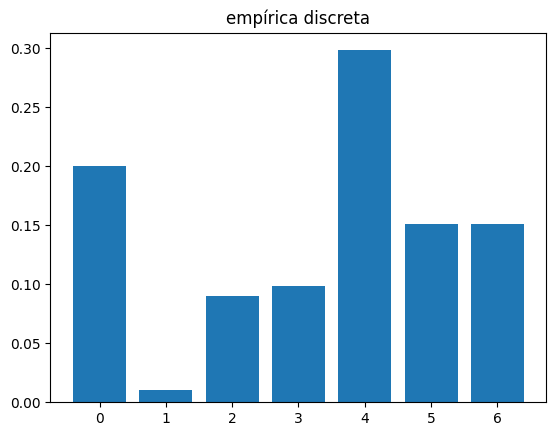

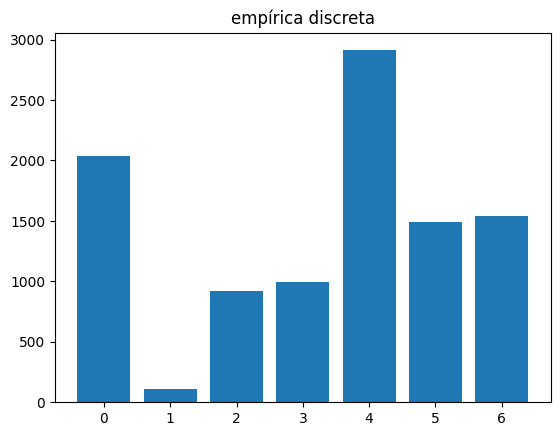

In [6]:
import random
import numpy as np

tamaño = 100000
lista = [0] * 7
for i in range(tamaño):
  x = random.random()
  if x>=0 and x<0.2:
    x = 0
  elif x>=0.2 and x<0.21:
    x = 1
  elif x>=0.21 and x<0.3:
    x = 2
  elif x>=0.3 and x<0.4:
    x = 3
  elif x>=0.4 and x<0.7:
    x = 4
  elif x>=0.7 and x<0.85:
    x = 5
  elif x>=0.85 and x<=1:
    x = 6
  lista[x] = lista[x] + 1

for i in range(7):
  lista[i] = lista[i] / tamaño

x = np.arange(7)
y = lista
plt.bar(x, y)
plt.title("empírica discreta")
plt.show()



lista = [[0,0.2],[1, 0.21],[2,0.3],[3,0.4],[4,0.7],[5,0.85],[6,1]]
def empirica(lista):
  x = random.random()
  for i in range(len(lista)):
    if x < lista[i][1]:
      return lista[i][0]

frec = [0] * 7
for i in range(10000):
  x = empirica(lista)
  frec[x] = frec[x] + 1

x = np.arange(7)
y = frec
plt.bar(x, y)
plt.title("empírica discreta")
plt.show()
